## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [2]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:

def build_mlp(input_shape, num_class=10, batch_size=32):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.models.Input(input_shape)
    x = keras.layers.Dense(units=512, activation='relu', name='hidden_layer1')(input_layer)
    x = keras.layers.BatchNormalization()(x)
    
    x = keras.layers.Dense(units=256, activation='relu', name='hidden_layer2')(x)
    x = keras.layers.BatchNormalization()(x)
    
    x = keras.layers.Dense(units=128, activation='relu', name='hidden_layer3')(x)
    x = keras.layers.BatchNormalization()(x)
    
    out = keras.layers.Dense(units=num_class, activation='softmax', name='output')(x)
    model = keras.models.Model(input=[input_layer], output=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
EPOCHS = 50
BATCH_SIZE = [32, 128, 256]
LEARNING_RATE = 1e-3
MOMENTUM = 0.95

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    exp_msg = 'exp_batch_%d' % batch_size 
    results[exp_msg] = {'loss': model.history.history["loss"],
                        'val_loss': model.history.history["val_loss"],
                        'train_acc': model.history.history["accuracy"],
                        'val_acc': model.history.history["val_accuracy"]}


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

Epoch 46/50
50000/50000 [==============================] - 18s 362us/step - loss: 0.8054 - accuracy: 0.7135 - val_loss: 1.5801 - val_accuracy: 0.5075
Epoch 47/50
50000/50000 [==============================] - 22s 433us/step - loss: 0.7931 - accuracy: 0.7162 - val_loss: 1.5192 - val_accuracy: 0.5204
Epoch 48/50
50000/50000 [==============================] - 20s 399us/step - loss: 0.7865 - accuracy: 0.7175 - val_loss: 1.6102 - val_accuracy: 0.5066
Epoch 49/50
50000/50000 [==============================] - 19s 376us/step - loss: 0.7939 - accuracy: 0.7149 - val_loss: 1.6026 - val_accuracy: 0.5105
Epoch 50/50
50000/50000 [==============================] - 20s 395us/step - loss: 0.7829 - accuracy: 0.7190 - val_loss: 1.6293 - val_accuracy: 0.5030
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
___________________________________

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.7664 - accuracy: 0.3866 - val_loss: 1.6317 - val_accuracy: 0.4245
Epoch 2/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4948 - accuracy: 0.4726 - val_loss: 1.5638 - val_accuracy: 0.4520
Epoch 3/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.3961 - accuracy: 0.5083 - val_loss: 1.5681 - val_accuracy: 0.4479
Epoch 4/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.3262 - accuracy: 0.5332 - val_loss: 1.5842 - val_accuracy: 0.4430
Epoch 5/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.2691 - accuracy: 0.5541 - val_loss: 1.6630 - val_accuracy: 0.4359
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.2204 - accuracy: 0.5702 - val_loss: 1.5323 - val_accuracy: 0.4619
Epoch 7/50
50000/50000 [==============================] - 7s 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.8744 - accuracy: 0.3566 - val_loss: 1.7263 - val_accuracy: 0.3955
Epoch 2/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.5481 - accuracy: 0.4534 - val_loss: 1.6004 - val_accuracy: 0.4378
Epoch 3/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.4456 - accuracy: 0.4882 - val_loss: 1.6115 - val_accuracy: 0.4347
Epoch 4/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.3741 - accuracy: 0.5155 - val_loss: 1.5343 - val_accuracy: 0.4555
Epoch 5/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.3191 - accuracy: 0.5357 - val_loss: 1.5290 - val_accuracy: 0.4651
Epoch 6/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.2691 - accuracy: 0.5536 - val_loss: 1.5480 - val_accuracy: 0.4518
Epoch 7/50
50000/50000 [==============================] - 4s 73us/st

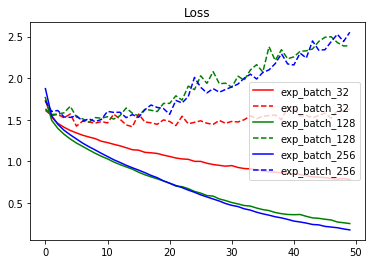

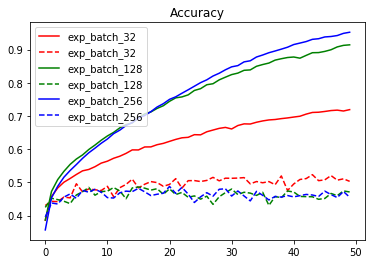

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ['r', 'g', 'b', 'y', 'm', 'k']
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['loss'])), results[cond]['loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_loss'])), results[cond]['val_loss'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Loss")
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])), results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_acc'])), results[cond]['val_acc'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Accuracy")
plt.show()